In [2]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler

# Load the Karate graph

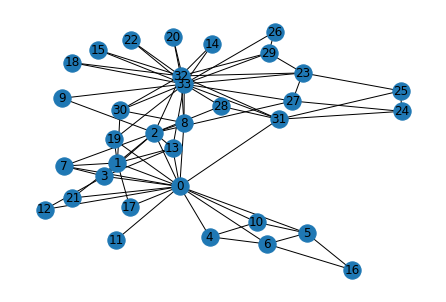

In [13]:
# Load the graph
G_karate = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

# print information of the graph

In [189]:
n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Number of nodes :", str(n))
print("Number of edges :", str(m))
print("Number of connected components :" ,str(nx.number_connected_components(G_karate)))

Number of nodes : 34
Number of edges : 78
Number of connected components : 1


# split the graph into train set and test set

In [190]:
# # Take a random sample of edges
# edge_subset = random.sample(G_karate.edges(), int(0.25 * G_karate.number_of_edges()))
# # Remove some edges
# G_karate_train = G_karate.copy()
# G_karate_train.remove_edges_from(edge_subset)

In [191]:
# print('edges nums of train set: ',G_karate_train.number_of_edges())
# print('edges nums of test set: ',len(edge_subset))

# features engineering
# features is that: (for edge(a,b))
* num of common neighbors of a and b
* num of neighbors of a
* num of neighbors of b
* total degrees of neighbors of a
* total degrees of neighbors of b
* num of nodes in the path from a to b
* total dergees of common neighbors of a and b

In [192]:
# num of common neighbors of a and b
def num_common_neighbors(a,b):
    return len(list(nx.common_neighbors(G_karate,a,b)))
# num of neighbors of a/b
def num_neighbors(node):
    return len(list(nx.all_neighbors(G_karate,node)))
# total degrees of neighbors of a/b
def total_degrees_of_neighbors(node):
    sum_degree=0
    for neighbor in sorted(nx.all_neighbors(G_karate,node)):
        sum_degree = sum_degree + len(list(nx.all_neighbors(G_karate,neighbor)))
    return sum_degree
# num of nodes in the path from a to b
def num_node_path(a,b): 
    return len(nx.shortest_path(G_karate,source=a,target=b))-2
# total dergees of common neighbors of a and b
def total_degrees_of_common_neighbors(a,b):
    sum_degree_common=0
    for neighbor in sorted(nx.common_neighbors(G_karate,a,b)):
        sum_degree_common = sum_degree_common + len(list(nx.all_neighbors(G_karate,neighbor)))
    return sum_degree_common


# create the dataset

In [193]:
'''an edge is a sample'''
edges=list(G_karate.edges())
# a
source=[x[0] for x in edges]
# b
target=[x[1] for x in edges]
# num of common neighbors of a and b
common_neighbors=[num_common_neighbors(x[0],x[1]) for x in edges]
# num of neighbors of a
neighbor_a=[num_neighbors(x) for x in source]
# num of neighbors of b
neighbor_b=[num_neighbors(x) for x in target]
# total degrees of neighbors of a
totoal_degree_neighbors_a=[total_degrees_of_neighbors(x) for x in source]
# total degrees of neighbors of b
totoal_degree_neighbors_b=[total_degrees_of_neighbors(x) for x in target]
# num of nodes in the path from a to b
node_path=[num_node_path(x[0],x[1]) for x in edges]
# total dergees of common neighbors of a and b
total_degree_common_neighbor=[total_degrees_of_common_neighbors(x[0],x[1]) for x in edges]


In [194]:
# create disconnected sample(edge)
def create_disconnected_edge(graph,num_sample):
    num_nodes=graph.number_of_nodes()
    exist_edges=list(graph.edges())
    edge_set=[]
    counts=0
    while counts < num_sample:
        a=np.random.randint(0,num_nodes)
        b=np.random.randint(0,num_nodes)
        while a==b:
            b=np.random.randint(0,num_nodes) 
        tmp_edge=(a,b)
        if tmp_edge in exist_edges or tmp_edge in edge_set:
            continue
        edge_set.append(tmp_edge)
        counts=counts+1
    return edge_set

In [195]:
'''an edge is a sample'''
disconnect_edge=create_disconnected_edge(G_karate,78)
# a
source_=[x[0] for x in disconnect_edge]
# b
target_=[x[1] for x in disconnect_edge]
# num of common neighbors of a and b
common_neighbors_=[num_common_neighbors(x[0],x[1]) for x in disconnect_edge]
# num of neighbors of a
neighbor_a_=[num_neighbors(x) for x in source_]
# num of neighbors of b
neighbor_b_=[num_neighbors(x) for x in target_]
# total degrees of neighbors of a
totoal_degree_neighbors_a_=[total_degrees_of_neighbors(x) for x in source_]
# total degrees of neighbors of b
totoal_degree_neighbors_b_=[total_degrees_of_neighbors(x) for x in target_]
# num of nodes in the path from a to b
node_path_=[num_node_path(x[0],x[1]) for x in disconnect_edge]
# total dergees of common neighbors of a and b
total_degree_common_neighbor_=[total_degrees_of_common_neighbors(x[0],x[1]) for x in disconnect_edge]


In [196]:
# create the dataframe
df_graph_connect=pd.DataFrame({
    'common_neighbors':common_neighbors,
    'neighbor_a':neighbor_a,
    'neighbor_b':neighbor_b,
    'totoal_degree_neighbors_a':totoal_degree_neighbors_a,
    'totoal_degree_neighbors_b':totoal_degree_neighbors_b,
    'node_path':node_path,
    'total_degree_common_neighbor':total_degree_common_neighbor,
    'class':[1]*len(edges)
})

df_graph_disconnect=pd.DataFrame({
    'common_neighbors':common_neighbors_,
    'neighbor_a':neighbor_a_,
    'neighbor_b':neighbor_b_,
    'totoal_degree_neighbors_a':totoal_degree_neighbors_a_,
    'totoal_degree_neighbors_b':totoal_degree_neighbors_b_,
    'node_path':node_path_,
    'total_degree_common_neighbor':total_degree_common_neighbor_,
    'class':[0]*len(disconnect_edge)
})

In [197]:
df_list=[df_graph_connect,df_graph_disconnect]
df_graph=pd.concat(df_list)
from sklearn.utils import shuffle
df_graph=shuffle(df_graph)
df_graph=df_graph.reset_index(drop=True)

In [302]:
df_graph.to_csv('graph_karate_df')

# 以上为处理数据
------

# extreme learning machine

In [200]:
import elm

## test the elm

In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [300]:
stdsc = StandardScaler()
# load dataset
iris = load_iris()
irx, iry = stdsc.fit_transform(iris.data), iris.target
x_train, x_test, y_train, y_test = train_test_split(irx, iry, test_size=0.2)
# built model and train
model = elm.elm(hidden_units=35, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
# print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
# print('classifier running time:', running_time)

# test
# prediction = model.predict(x_test)
# print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(x_test, y_test))

classifier train accuracy: 0.9583333333333334
classifier test accuracy: 0.9666666666666667


## we can find that the accuracy in iris data is good

# test the graph data

## test data 

In [301]:
df_graph_tmp=pd.read_csv('graph_karate_df')
X=df_graph_tmp.iloc[:,:-1]
y=df_graph_tmp.iloc[:,-1].values
# 归一化
ss=StandardScaler()
X_norm=ss.fit_transform(X)
# split the graph into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)

FileNotFoundError: [Errno 2] No such file or directory: 'graph_karate_df'

## plot function 

In [267]:
def acc_curve(n,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,C=0.1):
    model=elm.elm(hidden_units=n, activation_function='sigmoid', random_type='normal', x=X_train, y=y_train, C=C, elm_type='clf')
    beta, train_accuracy, running_time = model.fit('solution2')
    test_accuracy=model.score(X_test,y_test)
    return (train_accuracy,test_accuracy)

In [292]:
def plot_train_test_curve(C=0.1):
    train_accuracy_list=[]
    test_accuracy_list=[]
    x_plot=[*range(5,300,5)]
    for i in range(5,300,5):
        acc_train,acc_test=acc_curve(i,X_train,X_test,y_train,y_test,C)
        train_accuracy_list.append(acc_train)
        test_accuracy_list.append(acc_test)
    plt.figure(figsize=(15,5))
    plt.plot(x_plot,train_accuracy_list,color='r',label='train_accuracy')
    plt.plot(x_plot,test_accuracy_list,color='b',label='test_accuracy')
    plt.legend()
    plt.xticks([*range(5,300,15)])
    plt.grid()
    plt.show()

## test data

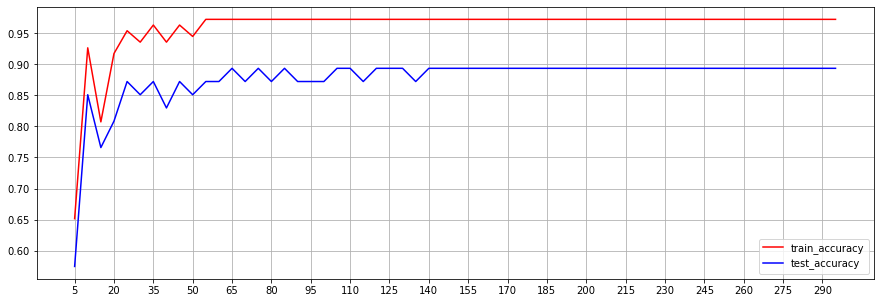

In [297]:
plot_train_test_curve(C=0.04)

In [298]:
# so we choose the nums of hidden_units=60
model=elm.elm(hidden_units=65, activation_function='sigmoid', random_type='normal', x=X_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier train accuracy:", train_accuracy)
prediction = model.predict(X_test)
# print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(X_test, y_test))

classifier train accuracy: 0.9724770642201835
classifier test accuracy: 0.8936170212765957
